<a href="https://colab.research.google.com/github/kari-hue/MachineLearningModels/blob/main/Red-wine%20quality%20analysis/RedWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Description**

**Name: Red wine quality analysis**

The dataset taken from kaggle contains samples of red wine and white wine data with several factors like acidity, citric acid content, sugar quantity etc as input and a physicochemical test done on these sensory data to determine the quality of the alchohol content on it on a scale between 0(being worst) to 10(the best quality wine).

**Dataset used in the project can be downloaded from below link:**

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009




In [ ]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [ ]:
## Reading the dataset

df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df.shape

(1599, 12)

## **Data Analysis Phase**

In this phase I will analyze the data to find out the below stuff

1. Missing Values
2. All the Numerical Varibles
3. Distribution of the Numerical Variables
4. Categorical varibles
5. Outliers
6. Relationship between Independent and dependent feature

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values in our dataset.

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  12


In [ ]:
# List of continuous variables

continuous_feature = [feature for feature in numerical_features if len(df[feature].unique()) > 25]
print(len(continuous_feature))

11


In [ ]:
continuous_feature

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

We have set 25 as the threshold value that means among all the 12 feature 11 feature are continous and only one feature is discrete i.e quality.

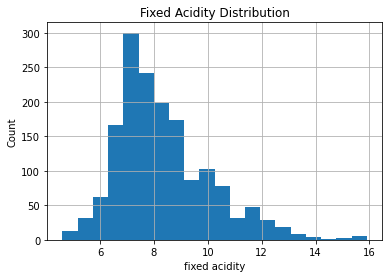

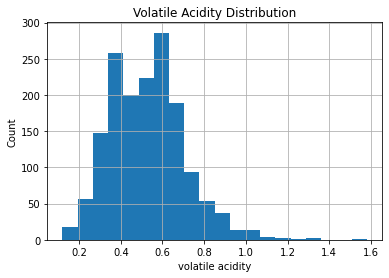

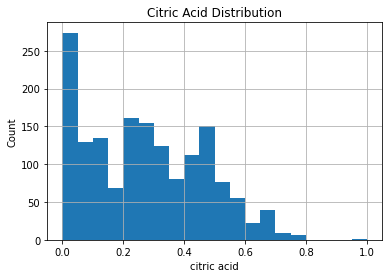

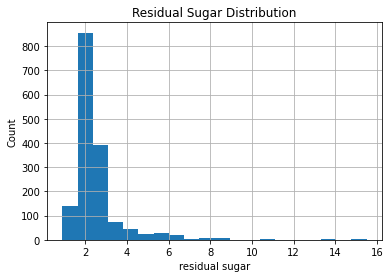

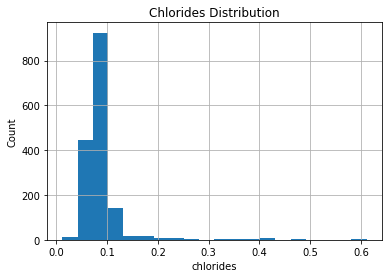

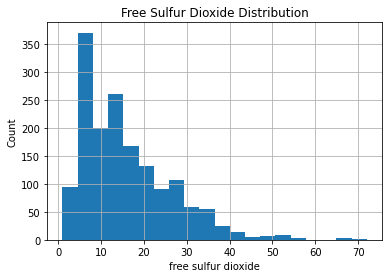

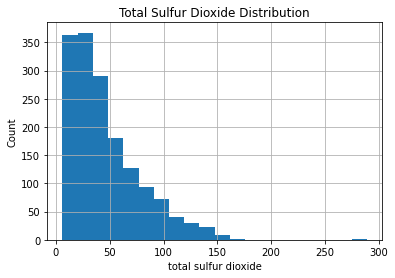

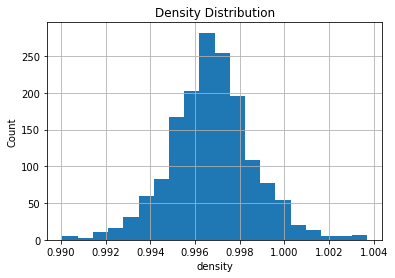

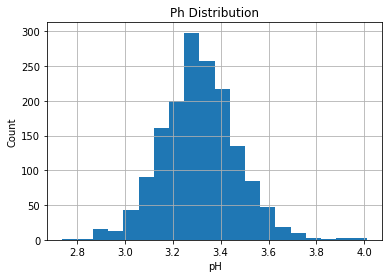

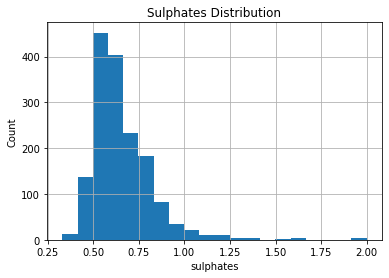

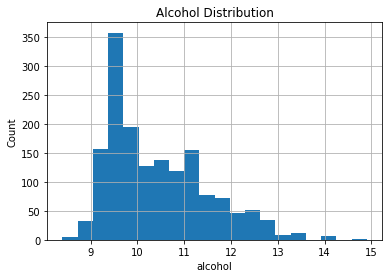

In [ ]:
## Let's see the distribution of our continuous variables

for feature in continuous_feature:
  data = df.copy()
  data[feature].hist(bins = 20)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature.title()+" " + "Distribution")
  plt.show()

The citric and alcohol distribution has very irregular kind of distribution whereas all other variables are either Normally distributed or left-right skewed.

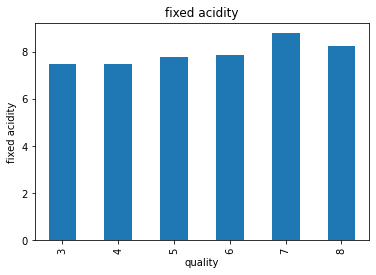

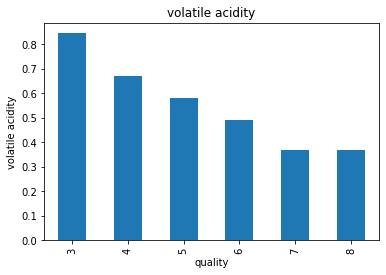

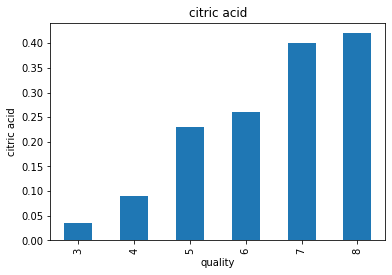

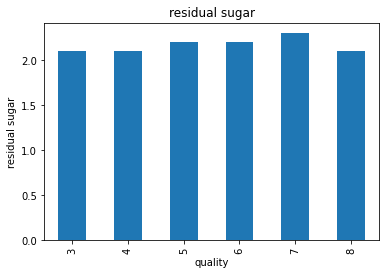

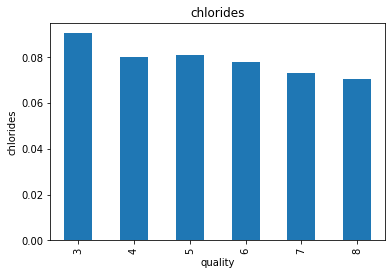

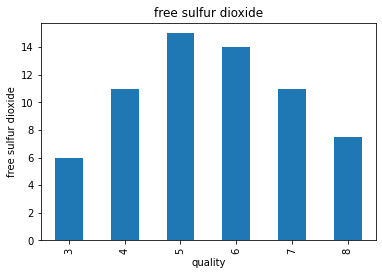

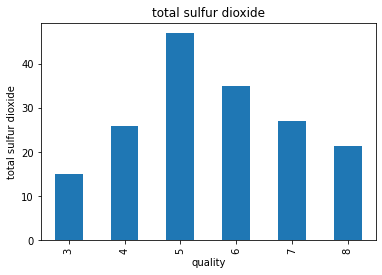

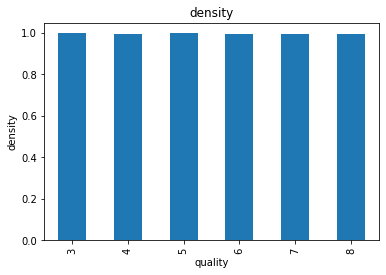

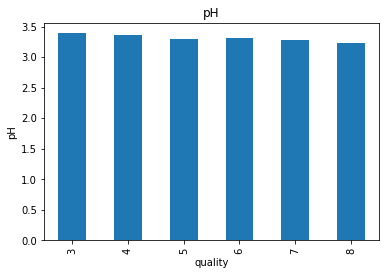

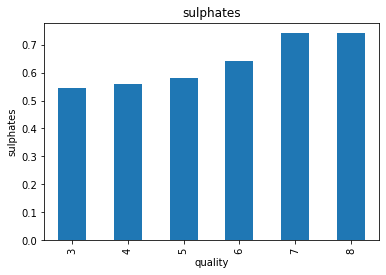

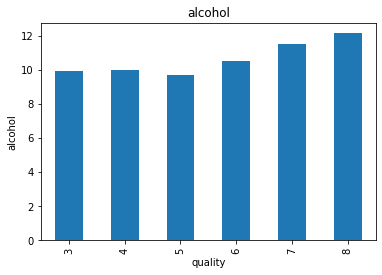

In [ ]:
# Let's see the relationship between the quality and these 11 features

for feature in continuous_feature:
  data = df.copy()
  data.groupby('quality')[feature].median().plot.bar()
  plt.xlabel('quality')
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

Here from the above diagrammetic study we can see that 3 factors i.e. citric acid,volatile acidity,sulphates really are important to determine the wine quality. The factors like total sulfur dioxide and free sulphur dioxide is showing some confusing charecteristics whereas other factors doesn't really contribute towards determining the wine quality.

# **Feature Engineering**

### **Outliers detection**

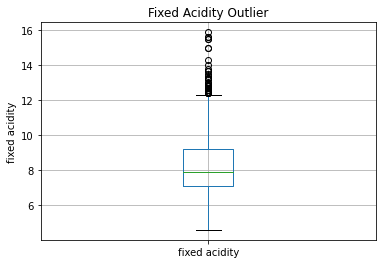

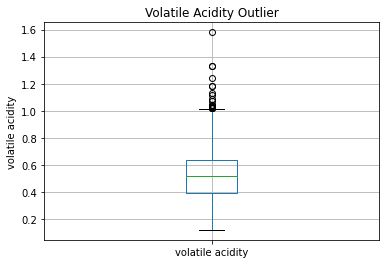

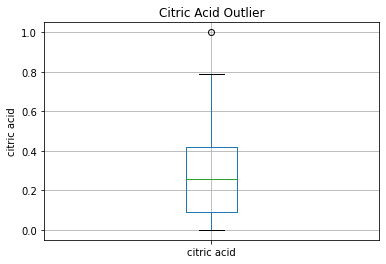

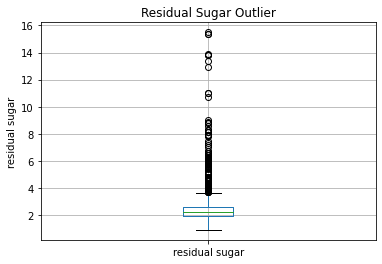

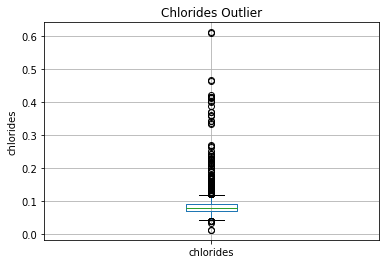

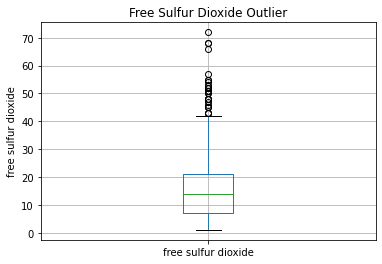

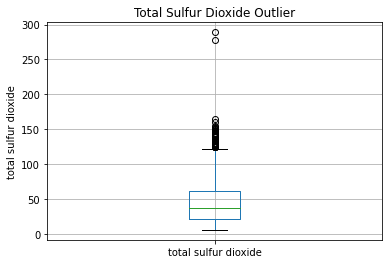

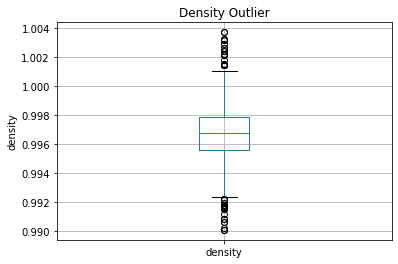

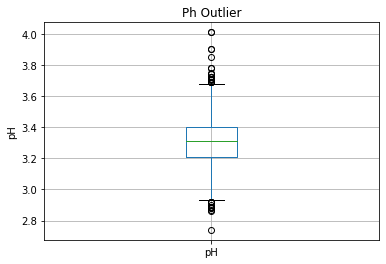

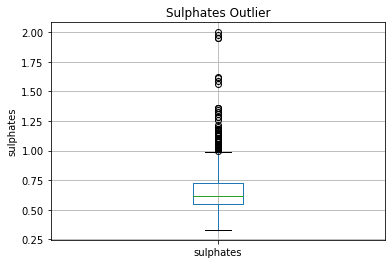

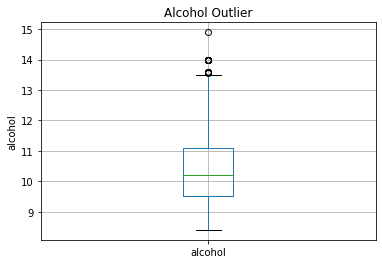

In [ ]:
for feature in continuous_feature:
  data = df.copy()
  data.boxplot(column = feature)
  plt.ylabel(feature)
  plt.title(feature.title() + " " + "Outlier")
  plt.show()


## **Outliers Removal using IQR**

In [ ]:
data = df.copy()


Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

data = data[(data > lower_limit) & (data < upper_limit)]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [ ]:
data.isnull().sum()

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      33
total sulfur dioxide     58
density                  45
pH                       35
sulphates                59
alcohol                  14
quality                  28
dtype: int64

## Handaling the missing value after removing outliers

In [ ]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  12


In [ ]:
for feature in numerical_features:
  median_value = data[feature].median()
  data[feature].fillna(median_value,inplace = True)

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

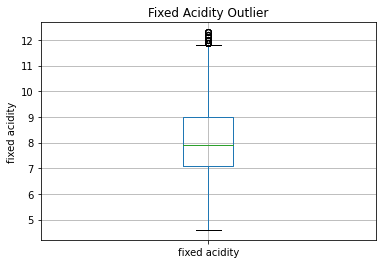

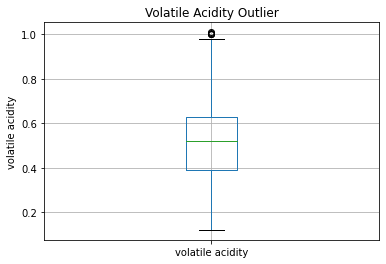

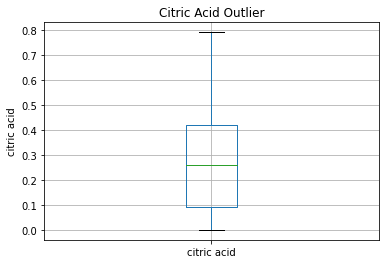

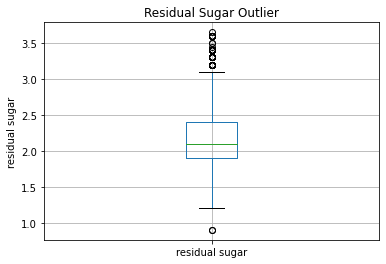

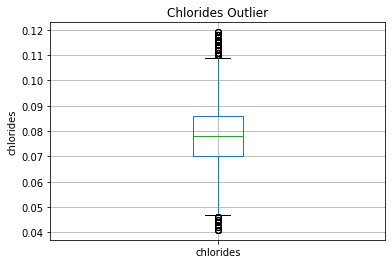

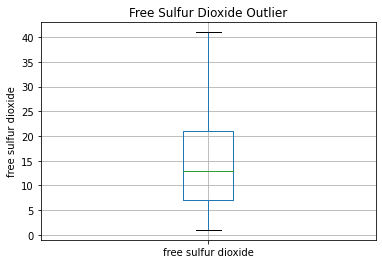

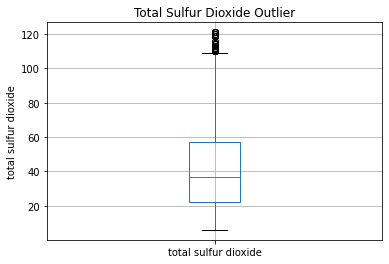

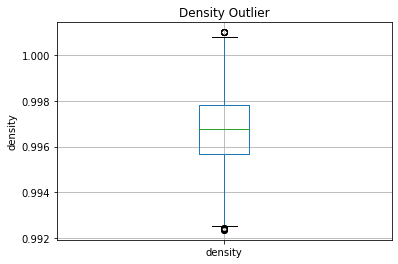

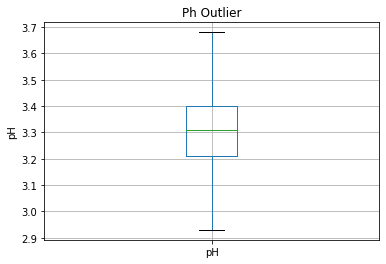

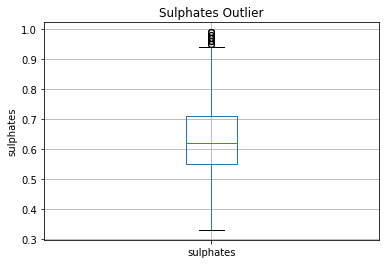

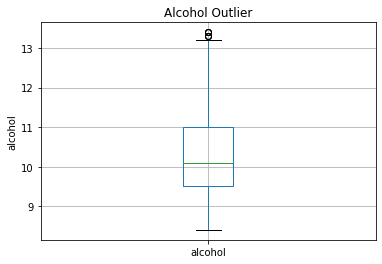

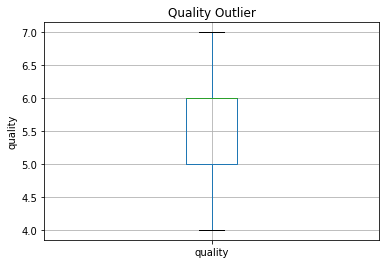

In [ ]:
## Let's plot some boxplot 

for feature in data:
  data.boxplot(column = feature)
  plt.ylabel(feature)
  plt.title(feature.title() + " " + "Outlier")
  plt.show()

#### And wallah! we have sucessfully removed many outliers from the variables.

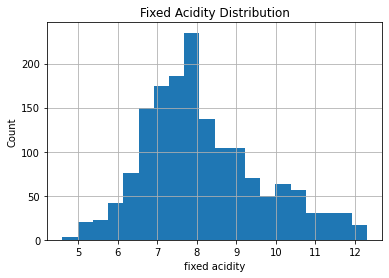

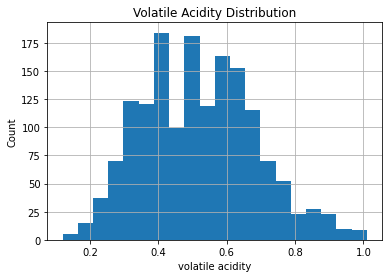

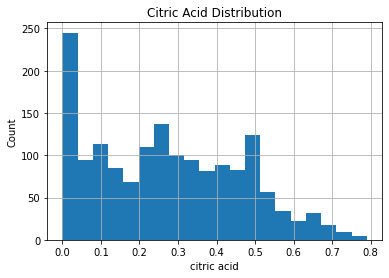

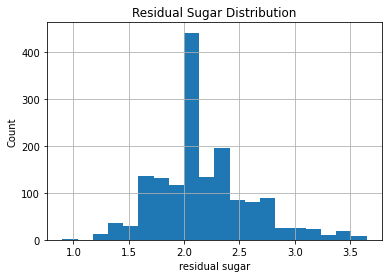

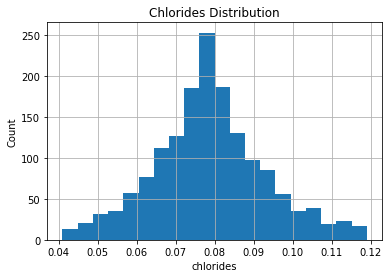

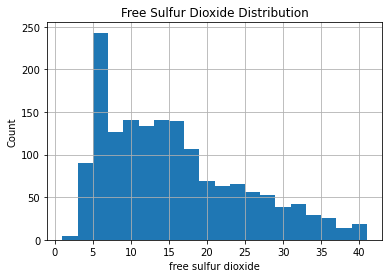

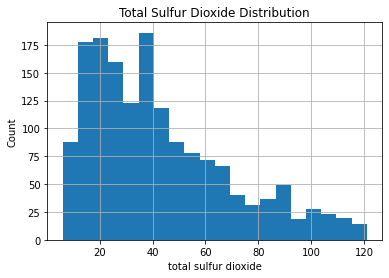

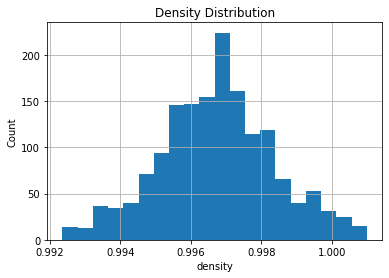

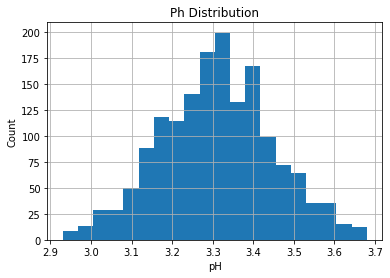

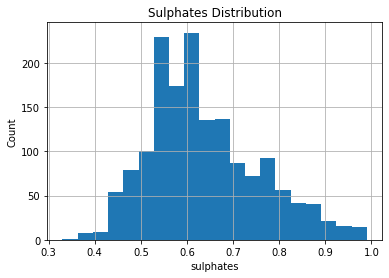

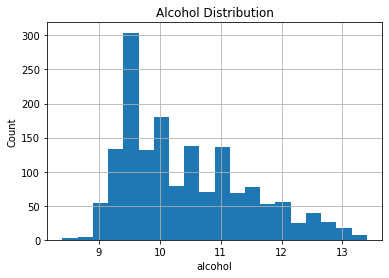

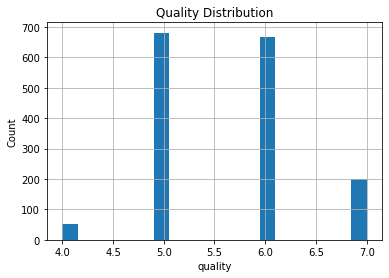

In [ ]:
## Let's do some visualization to see weather or not we have improved the distrubtion of our skewed variables

for feature in data:
  data[feature].hist(bins = 20)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature.title()+" " + "Distribution")
  plt.show()

## Using log transformation for normalizing skewed data.





In [ ]:
## From above observation we see that total sulfur dioxide and free sulphur dioxide are teo skewed variable in our data set so let's transform them

skewed_data =['free sulfur dioxide','free sulfur dioxide','citric acid','alcohol']

for feature in skewed_data:
  if 0 in data[feature].unique():
    pass
  
  else:
    data[feature] = np.log(data[feature])
    data[feature]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,2.397895,34.0,0.99780,3.51,0.56,2.240710,5.0
1,7.8,0.880,0.00,2.6,0.098,3.218876,67.0,0.99680,3.20,0.68,2.282382,5.0
2,7.8,0.760,0.04,2.3,0.092,2.708050,54.0,0.99700,3.26,0.65,2.282382,5.0
3,11.2,0.280,0.56,1.9,0.075,2.833213,60.0,0.99800,3.16,0.58,2.282382,6.0
4,7.4,0.700,0.00,1.9,0.076,2.397895,34.0,0.99780,3.51,0.56,2.240710,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,3.465736,44.0,0.99490,3.45,0.58,2.351375,5.0
1595,5.9,0.550,0.10,2.2,0.062,3.663562,51.0,0.99512,3.52,0.76,2.415914,6.0
1596,6.3,0.510,0.13,2.3,0.076,3.367296,40.0,0.99574,3.42,0.75,2.397895,6.0
1597,5.9,0.645,0.12,2.0,0.075,3.465736,44.0,0.99547,3.57,0.71,2.322388,5.0


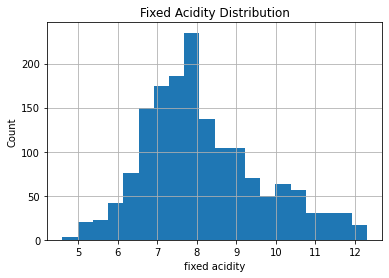

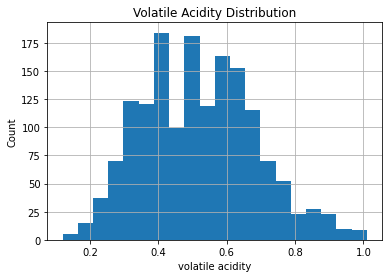

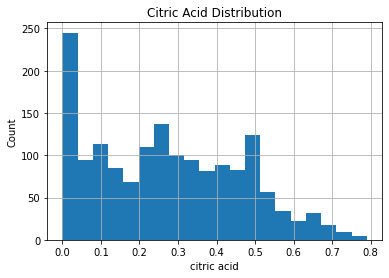

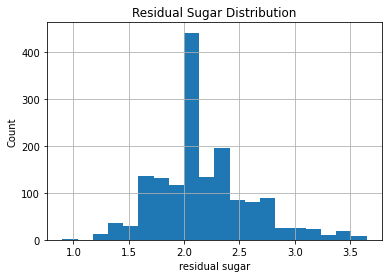

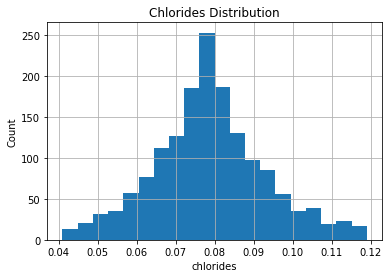

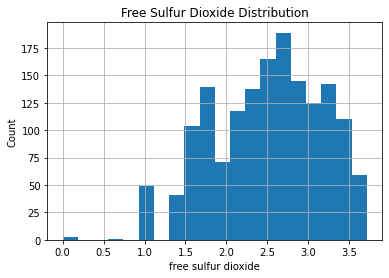

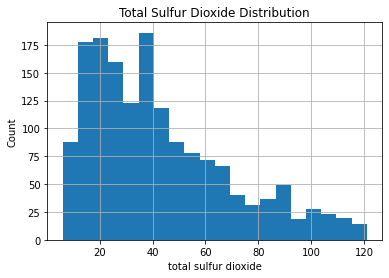

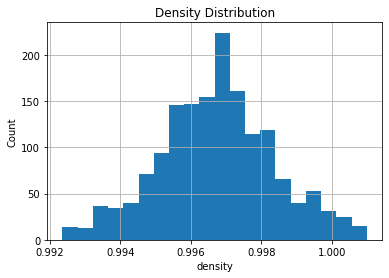

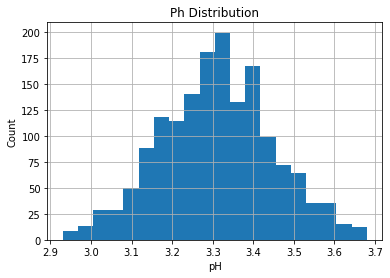

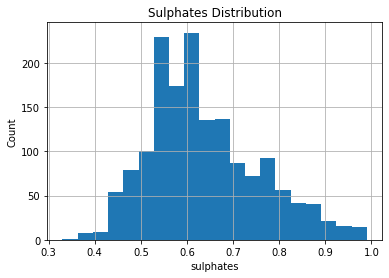

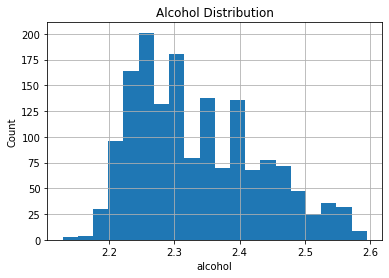

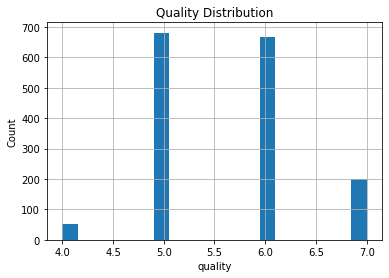

In [ ]:
for feature in data:
  data[feature].hist(bins = 20)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature.title()+" " + "Distribution")
  plt.show()

#### Fine for now.

In [ ]:
## 

data['quality'].unique()

array([5., 6., 7., 4.])

## **Feature selection** - Using Corelation technique

In [ ]:
X = df.drop('quality',axis = 1)  #Feature matrix
y = df['quality']


In [ ]:
## Seperate dataset into train and test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)


X_train.isnull().sum(),X_test.isnull().sum()



(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 dtype: int64, fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 dtype: int64)

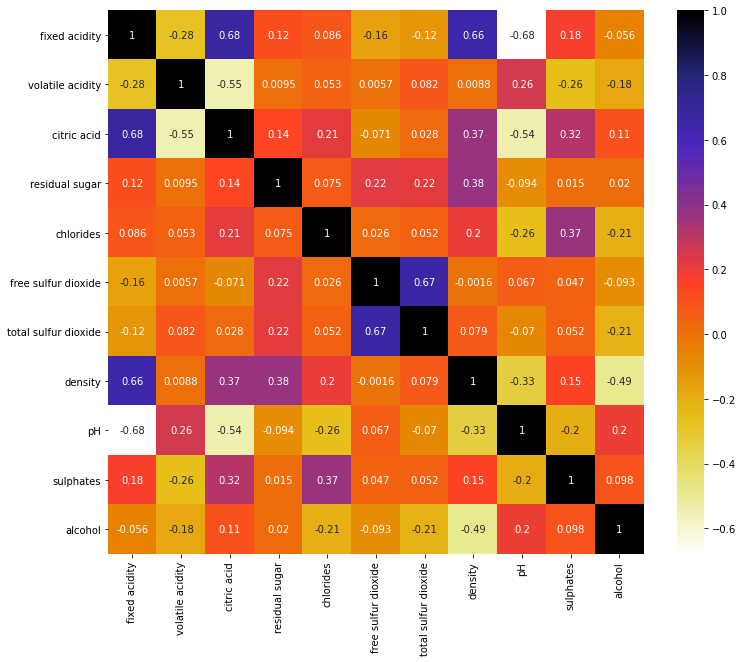

In [ ]:
## Finding the corelation using pearson's correlation and represting it through a heatmap

plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(cor,annot = True,cmap = plt.cm.CMRmap_r)
plt.show()


In [ ]:
## With the following function we can select highly correlated features 


def correlation(dataset,threshold):
  col_corr = set()     #Set of all the mandes of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j] > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train,0.6)
(corr_features)

{'citric acid', 'density', 'total sulfur dioxide'}

In [ ]:
X_train = X_train.drop(corr_features,axis = 1)
X_test = X_test.drop(corr_features,axis = 1)



In [ ]:
X_train

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
642,9.9,0.540,2.3,0.071,16.0,3.39,0.62,9.4
679,10.8,0.260,3.3,0.060,20.0,3.13,0.54,9.6
473,9.9,0.350,2.1,0.062,5.0,3.26,0.79,10.6
390,5.6,0.850,1.4,0.045,12.0,3.56,0.82,12.9
1096,6.6,0.725,5.5,0.117,9.0,3.35,0.49,10.8
...,...,...,...,...,...,...,...,...
763,9.3,0.655,2.0,0.096,5.0,3.25,0.42,9.6
835,7.6,0.665,1.5,0.066,27.0,3.39,0.51,9.3
1216,7.9,0.570,2.0,0.079,10.0,3.29,0.69,9.5
559,13.0,0.470,4.3,0.085,6.0,3.30,0.68,12.7


## **Feature Scaling**

In [ ]:
## Performing data standarization

from sklearn.preprocessing import StandardScaler

stdscale =StandardScaler().fit(X_train)
x_train_std = stdscale.transform(X_train)
X_test_std = stdscale.transform(X_test)

x_train_std.shape,X_test_std.shape


((1279, 8), (320, 8))

In [ ]:
from sklearn.metrics import accuracy_score

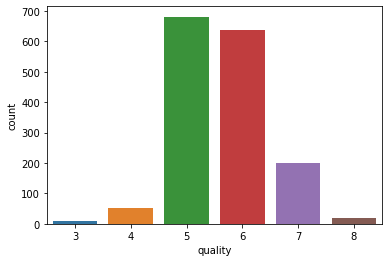

In [ ]:
sns.countplot(x = 'quality',data = df)
plt.show()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_std,y_train)
prediction = lr.predict(X_test_std)
accuracy_score(y_test,prediction)

0.6125

In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

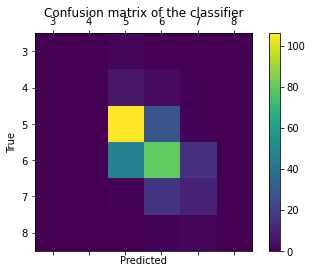

In [ ]:
from sklearn.metrics import confusion_matrix

labels = [3,4,5,6,7,8]
cm = confusion_matrix(y_test,prediction)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_std,y_train)
predicti = dt.predict(X_test_std)
accuracy_score(y_test,predicti)

0.628125

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_std,y_train)
pred = rf.predict(X_test_std)
accuracy_score(y_test,pred)

0.728125